In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

## Загрузка данных

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.7 KB


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [45]:
df_train.shape[1]-1 == df_test.shape[1]

True

In [46]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [47]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


## Приведение типов

In [48]:
df_train.dtypes

Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points       float64
choose                   int64
dtype: object

In [49]:
df_train['Id'] = df_train['Id'].astype(str)
df_test['Id'] = df_train['Id'].astype(str)

## Распределение признаков

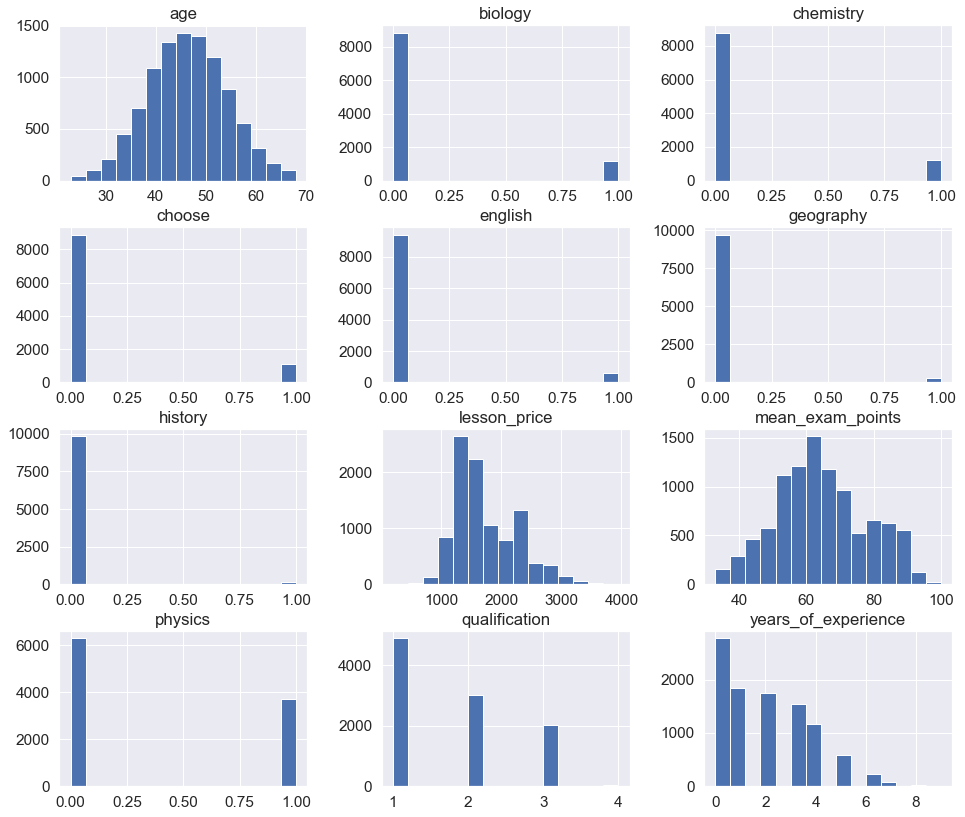

In [50]:
df_train.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

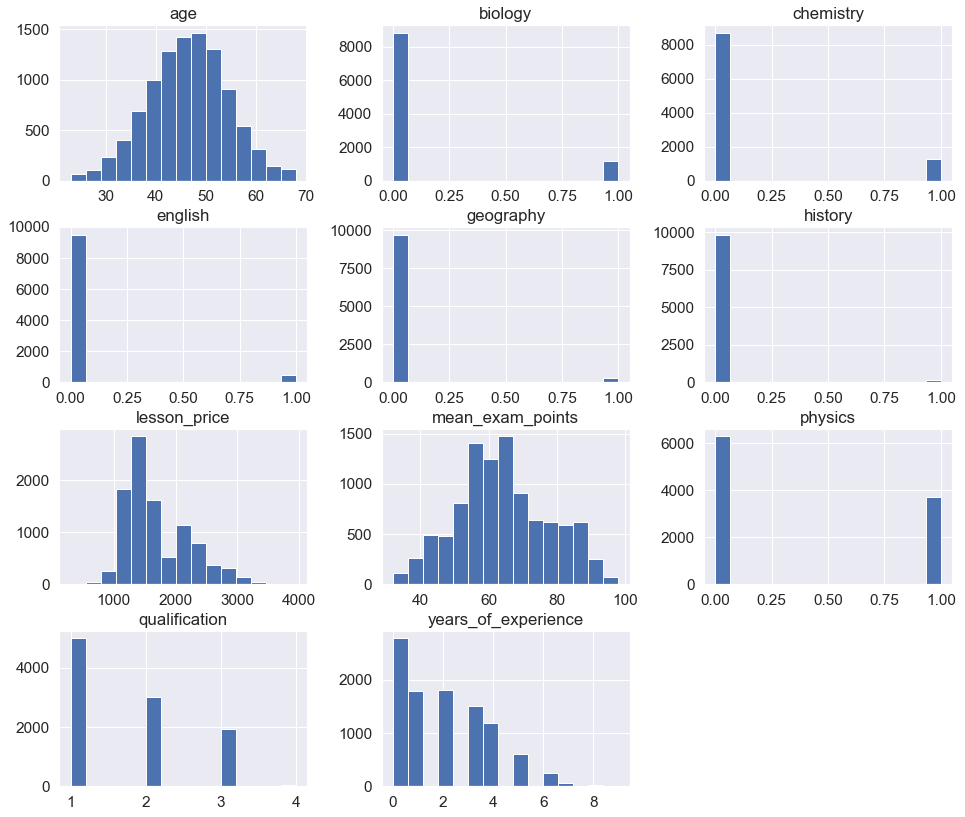

In [51]:
df_test.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

## Age

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


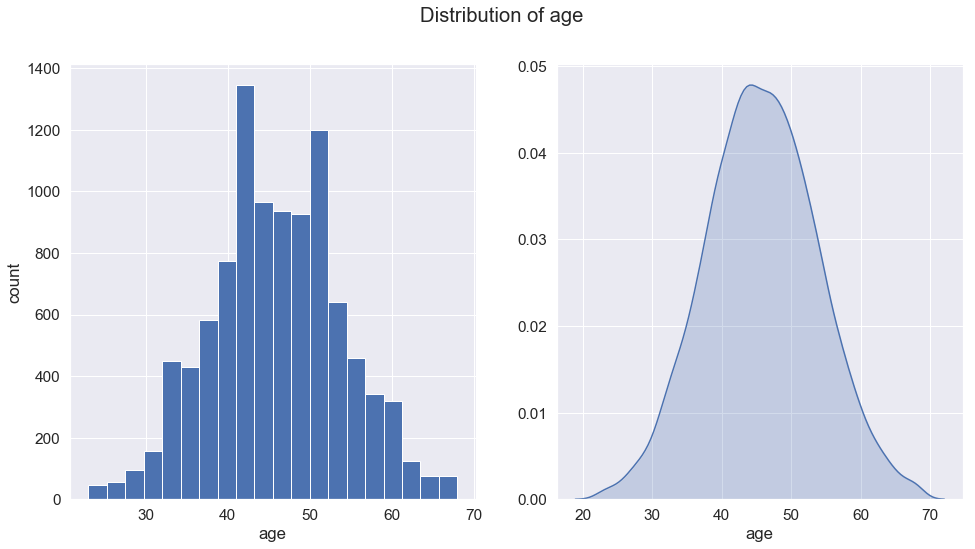

In [52]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['age'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('age')

plt.subplot(122)
sns.kdeplot(df_train['age'], shade=True, legend=False)
plt.xlabel('age')

plt.suptitle('Distribution of age')
plt.show()

## Lesson_price

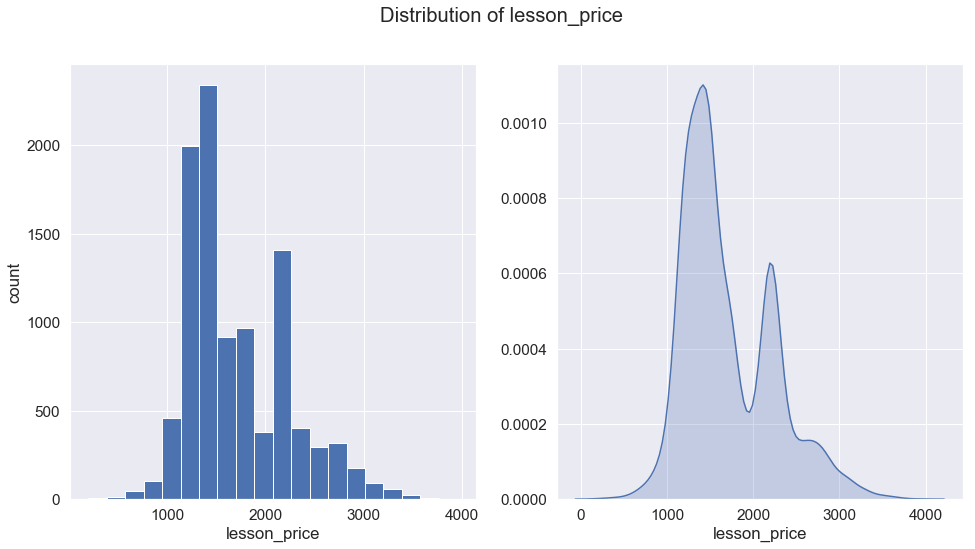

In [53]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['lesson_price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('lesson_price')

plt.subplot(122)
sns.kdeplot(df_train['lesson_price'], shade=True, legend=False)
plt.xlabel('lesson_price')

plt.suptitle('Distribution of lesson_price')
plt.show()

## Mean_exam_points

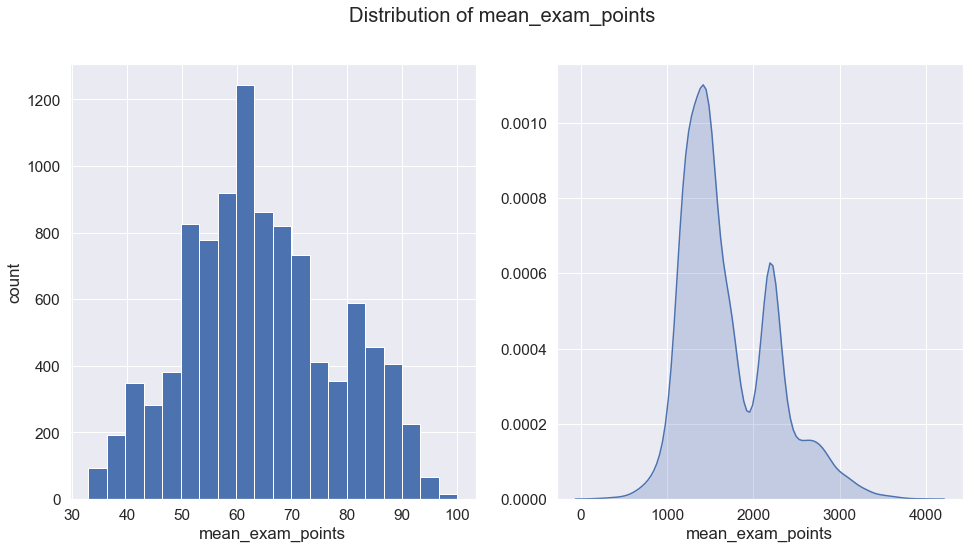

In [54]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['mean_exam_points'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('mean_exam_points')

plt.subplot(122)
sns.kdeplot(df_train['lesson_price'], shade=True, legend=False)
plt.xlabel('mean_exam_points')

plt.suptitle('Distribution of mean_exam_points')
plt.show()

## Матрица корреляции

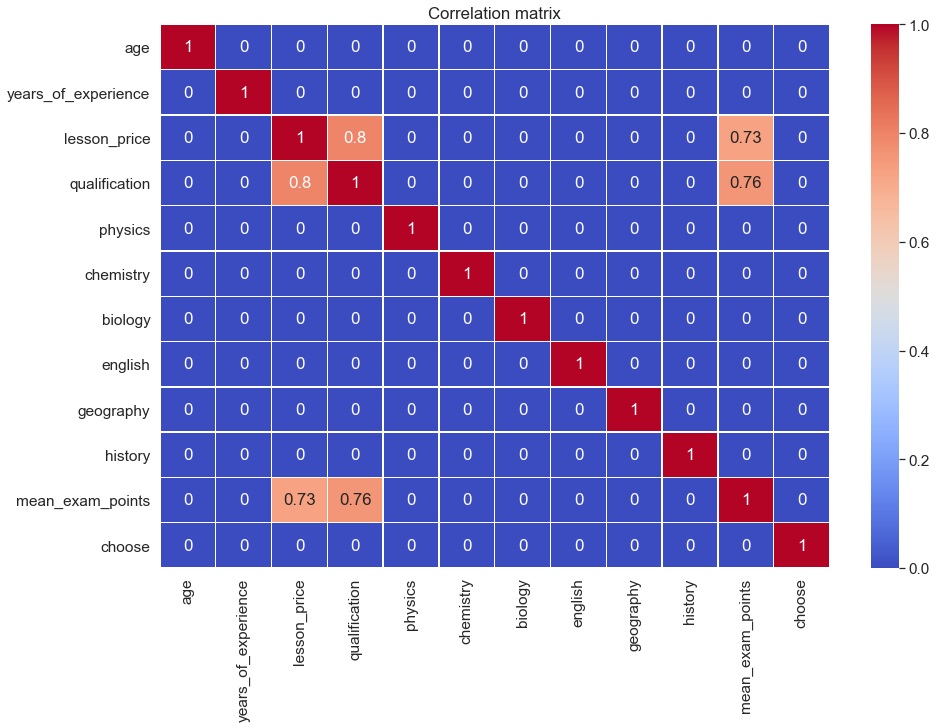

In [55]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## Реализация алгоритма

In [56]:
class Node:
    """Класс узла"""
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

class Leaf:
    """Класс терминального узла (листа)"""
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction

class RandomForestClassifier():
    """Класс алгоритма RandomForestClassifier"""

    @property
    def forest_(self):
        return self.forest
    
    @property
    def n_trees_(self):
        return self.n_trees

    def __init__(self, n_trees = 1, max_depth=5, min_leaf=1, random_state=42):
        self.n_trees = n_trees
        self.random_state = random_state
        self.max_depth = max_depth
        self.min_leaf = min_leaf
        self.forest = []

    def bootstrap(self, X, y):
        n_samples = X.shape[0]
        np.random.seed(self.random_state)
        
        bootstrap = []
        for i in range(self.n_trees):
            b_data = np.zeros(X.shape)
            b_labels = np.zeros(y.shape)
            
            for j in range(n_samples):
                sample_index = np.random.randint(0, n_samples-1)
                b_data[j] = X[sample_index]
                b_labels[j] = y[sample_index]
            bootstrap.append((b_data, b_labels))
        
        return bootstrap
    
    def subsample(self, len_sample):
        # будем сохранять не сами признаки, а их индексы
        sample_indexes = [i for i in range(len_sample)]
        
        len_subsample = int(np.sqrt(len_sample))
        
        subsample = []
        np.random.shuffle(sample_indexes)
        for _ in range(len_subsample):
            subsample.append(sample_indexes.pop())
        
        return subsample
    
    def calc_criterion(self, y):
        """Расчет критерия информативности"""

        #  подсчет количества объектов разных классов
        classes = {}
        for label in y:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        # Расчет критерия Джини
        impurity = 1
        for label in classes:
            p = classes[label] / len(y)
            impurity -= p ** 2

        return impurity
    
    def quality(self, left_labels, right_labels, current_criterion):
        """Расчет качества"""

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        
        return current_criterion - p * self.calc_criterion(left_labels) - (1 - p) * self.calc_criterion(right_labels)

    @staticmethod
    def split(X, y, index, t):
        """Разбиение датасета в узле"""

        left = np.where(X[:, index] <= t)
        right = np.where(X[:, index] > t)
            
        true_data = X[left]
        false_data = X[right]
        true_labels = y[left]
        false_labels = y[right]
            
        return true_data, false_data, true_labels, false_labels

    def find_best_split(self, X, y):
        """Нахождение наилучшего разбиения"""

        current_criterion = self.calc_criterion(y)

        best_quality = 0
        best_t = None
        best_index = None
        
        n_features = X.shape[1]
        
        # выбор индекса из подвыборки длиной sqrt(n_features)
        subsample = self.subsample(n_features)
        
        for index in subsample:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in X])
            
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(X, y, index, t)
                #  пропускаем разбиения, в которых в узле объектов менее заданных в min_leaf
                if len(true_data) < self.min_leaf or len(false_data) < self.min_leaf:
                    continue
                
                current_quality = self.quality(true_labels, false_labels, current_criterion)
                
                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    def tree(self, X, y):

        def build_tree(X, y, **kwargs):
            """Построение дерева с помощью рекурсивной функции"""
            
            # ограничение по глубине дерева
            kwargs['depth'] += 1
            if kwargs['depth'] > self.max_depth:
                return Leaf(X, y)

            quality, t, index = self.find_best_split(X, y)

            #  Базовый случай - прекращаем рекурсию, когда нет прироста качества
            if quality == 0:
                return Leaf(X, y)

            true_data, false_data, true_labels, false_labels = self.split(X, y, index, t)

            # Рекурсивно строим два поддерева
            true_branch = build_tree(true_data, true_labels, depth=kwargs['depth'])
            false_branch = build_tree(false_data, false_labels, depth=kwargs['depth'])
            
            # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
            return Node(index, t, true_branch, false_branch)
    
        return build_tree(X, y, depth=0)
    
    def predict(self, X, proba=False):
        """Предсказание голосованием деревьев """
        
        def tree_predict(X, tree):
            """Функция формирования предсказания по выборке на одном дереве"""
            
            return [classify_object(obj, tree) for obj in X]
        
        def classify_object(obj, node):
            """Функция классификации отдельного объекта"""

            #  Останавливаем рекурсию, если достигли листа
            if isinstance(node, Leaf):
                return node.prediction
            
            if obj[node.index] <= node.t:
                return classify_object(obj, node.true_branch)
            else:
                return classify_object(obj, node.false_branch)
        
        # добавим предсказания всех деревьев в список
        predictions = []
        for tree in self.forest:
            prediction = tree_predict(X, tree)
            predictions.append(prediction)
        
        # сформируем список с предсказаниями для каждого объекта
        predictions_per_object = list(zip(*predictions))
        
        answers = []
        if proba is True:
            for obj in predictions_per_object:
                class_0 = 0
                class_1 = 0
                for itm in obj:
                    if itm == 0:
                        class_0 += 1
                    else:
                        class_1 += 1
                probability = class_1 / (class_0 + class_1)
                answers.append(probability)
        else:
            for obj in predictions_per_object:
                predicted_class = max(set(obj), key=obj.count)
                answers.append(predicted_class)
        
        return answers

    def predict_proba(self, X):
        """Получение вероятности предсказания"""
        
        return self.predict(X, proba=True)
    
    def fit(self, X, y):
        bootstrap = self.bootstrap(X, y)
        
        for b_data, b_labels in bootstrap:
            self.forest.append(self.tree(b_data, b_labels))

### Вспомогательные функции

In [61]:
def balance_df_by_target(df, target_name, balancing_type='oversampling'):
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()
    
    if balancing_type == 'oversampling':
        
        disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)

        return df.sample(frac=1) 
    
    if balancing_type == 'undersampling':
        
        major_class_sample = df[df[target_name] == major_class_name].sample(target_counts[minor_class_name])
        minor_class_sample = df[df[target_name] == minor_class_name]
        
        df = pd.concat([major_class_sample, minor_class_sample], ignore_index=True)
        
        return df.sample(frac=1) 

def accuracy_metric(actual, predicted):
    """Подсчет метрики Accuracy"""
    
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def std_func(x):
    """Функция стандартизации"""
    
    return (x - x.mean()) / x.std()

def print_results(model, X_train, X_test, y_train, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Train')
    print(f'Accuracy: {accuracy_metric(y_train, y_train_pred):.3f}')
    print(f'ROC AUC: {roc_auc_score(y_train, model.predict_proba(X_train)):.3f}')
    print('Classification report')
    print(classification_report(y_train, y_train_pred))
    
    print('\nTest')
    print(f'Accuracy: {accuracy_metric(y_test, y_test_pred):.3f}')
    print(f'ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)):.3f}')
    print('Classification report')
    print(classification_report(y_test, y_test_pred))
    
    print('\nConfusion matrix')
    print(confusion_matrix(y_test, y_test_pred))

### Выравнивание обучающей выборки по классам

In [ ]:
df_train_balanced = balance_df_by_target(df_train, target_name, balancing_type='oversampling')
df_train_balanced[target_name].value_counts()

In [ ]:
np_train = df_train_balanced.to_numpy()
np_test = df_test.to_numpy()

print(np_train.shape)
print(np_test.shape)

### Разбиение на train/test

In [58]:
X = std_func(np_train[:,1:12])
y = np_train[:,-1].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True,
    test_size=0.25,
    random_state=0,
    stratify=y
)

### Обучение модели

In [ ]:
clf = RandomForestClassifier(
    n_trees=500,
    max_depth=8,
    min_leaf=1,
    random_state=0,
)
clf.fit(X_train, y_train)

print_results(clf, X_train, X_test, y_train, y_test)

### Сохранение результата

In [ ]:
X_final = std_func(np_test[:,1:12])
y_pred_proba_final = clf.predict_proba(X_final)

preds_final = pd.DataFrame()
preds_final['Id'] = df_test['Id'].copy()
preds_final['choose'] = y_pred_proba_final
preds_final.to_csv('./predictions.csv', index=False, encoding='utf-8', sep=',')

preds_final.head()